<a href="https://colab.research.google.com/github/aliceechen1206/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv ('/content/drive/MyDrive/Coding Dojo/Week 1/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Looking at the Missing Value it seems that the ones that are missing are Item Weight and Outlet Size. Ive decided to use the avg of Item Weight for the missing values. As for the Outlet Size ive decided to drop the column.

In [8]:
weight_median = df['Item_Weight'].median()
df['Item_Weight'].fillna(weight_median, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.drop (columns='Outlet_Size', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace ('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace ('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace ('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
df ['Item_Weight'].min()

4.555

In [14]:
df ['Item_Weight'].max()

21.35

In [15]:
df ['Item_Weight'].mean()

12.81341957057374

In [16]:
df ['Item_Visibility'].min()

0.0

In [17]:
df ['Item_Visibility'].max()

0.328390948

In [18]:
df ['Item_Visibility'].mean()

0.06613202877895108

In [19]:
df ['Item_MRP'].min()

31.29

In [20]:
df ['Item_MRP'].max()

266.8884

In [21]:
df ['Item_MRP'].mean()

140.9927819781767

In [22]:
df ['Outlet_Establishment_Year'].min()

1985

In [23]:
df ['Outlet_Establishment_Year'].max()

2009

In [24]:
df ['Outlet_Establishment_Year'].mean()

1997.8318667135984

In [25]:
df ['Item_Outlet_Sales'].min()

33.29

In [26]:
df ['Item_Outlet_Sales'].max()

13086.9648

In [27]:
df ['Item_Outlet_Sales'].mean()

2181.288913575032

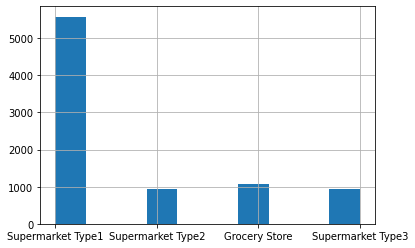

In [28]:
# Compared types of of Supermarket/Grocery
df['Outlet_Type'].hist()

Majority of Outlet Type are Supermarket Type 1

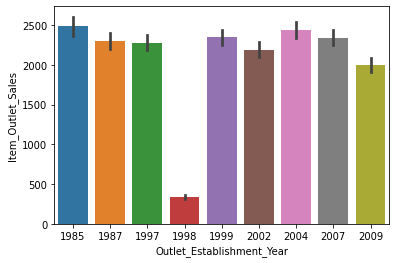

In [29]:
# Compare if when the establish year contributes to Item Outlet Sales
sns.barplot (data=df,x='Outlet_Establishment_Year', y='Item_Outlet_Sales')

Majority of Item Outlet Sale is not dependent on Outlet Establishment Year

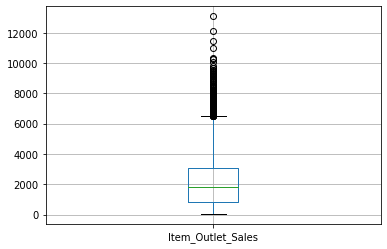

In [30]:
#Using boxplot to look at distribution of Item Outlet Sales
df.boxplot(column = 'Item_Outlet_Sales')

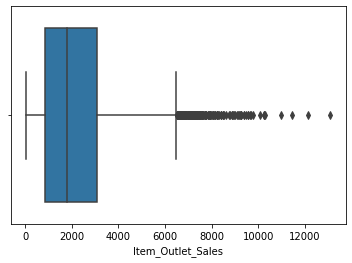

In [31]:
sns.boxplot(data=df, x='Item_Outlet_Sales')

The median of Item Outlet Sales is roughly 2181

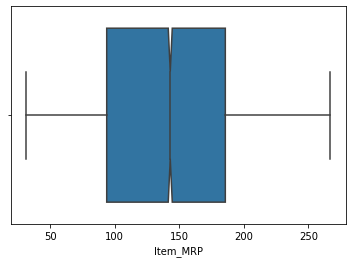

In [32]:
#Using boxplot with seaborn to look at distribution of maximum retail price of the product
sns.boxplot(data=df, x='Item_MRP', notch=True)

The median of Item MRP is roughly 140

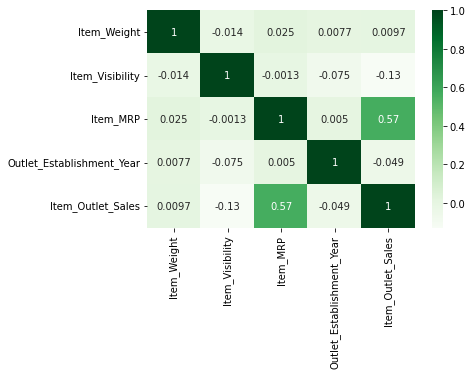

In [33]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

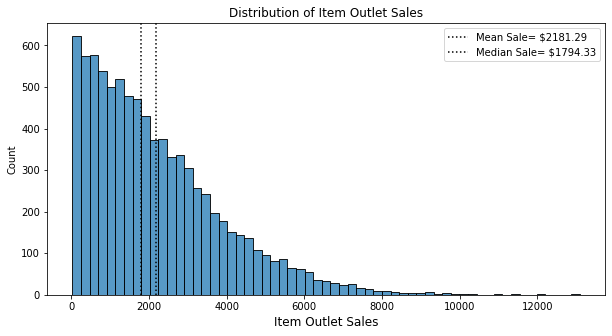

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Item_Outlet_Sales', ax=ax)
ax.set(title='Distribution of Item Outlet Sales')
ax.set_xlabel("Item Outlet Sales",
            fontsize='large');

mean_price = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Sale= ${round(mean_price,2)}");

med_price = df['Item_Outlet_Sales'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Sale= ${round(med_price,2)}");

ax.legend();

Graph shows that average sale is 2181.29 and median sale being 1794.33

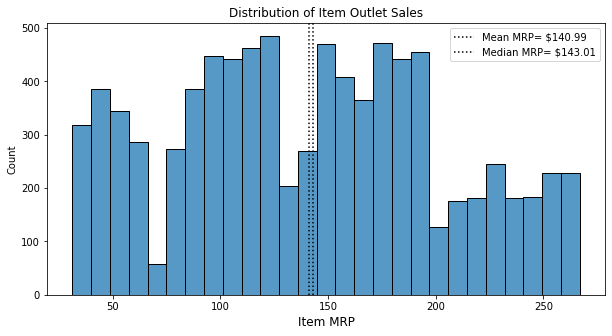

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Item_MRP', ax=ax)
ax.set(title='Distribution of Item Outlet Sales')
ax.set_xlabel("Item MRP",
            fontsize='large');

mean_MRP = df['Item_MRP'].mean()
ax.axvline(mean_MRP,color='k', ls=':', 
           label=f"Mean MRP= ${round(mean_MRP,2)}");

med_MRP = df['Item_MRP'].median()
ax.axvline(med_MRP,color='k', ls=':', 
           label=f"Median MRP= ${round(med_MRP,2)}");

ax.legend();

Graph shows that average MRP is 140.99 and median MRP is 143.01